In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('../work/traffic_accidents.csv')
df = data.copy()
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [6]:
df.isnull().sum()

crash_date                       0
traffic_control_device           0
weather_condition                0
lighting_condition               0
first_crash_type                 0
trafficway_type                  0
alignment                        0
roadway_surface_cond             0
road_defect                      0
crash_type                       0
intersection_related_i           0
damage                           0
prim_contributory_cause          0
num_units                        0
most_severe_injury               0
injuries_total                   0
injuries_fatal                   0
injuries_incapacitating          0
injuries_non_incapacitating      0
injuries_reported_not_evident    0
injuries_no_indication           0
crash_hour                       0
crash_day_of_week                0
crash_month                      0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_units,209306.0,2.063300,0.396012,1.0,2.0,2.0,2.0,11.0
injuries_total,209306.0,0.382717,0.799720,0.0,0.0,0.0,1.0,21.0
injuries_fatal,209306.0,0.001859,0.047502,0.0,0.0,0.0,0.0,3.0
injuries_incapacitating,209306.0,0.038102,0.233964,0.0,0.0,0.0,0.0,7.0
injuries_non_incapacitating,209306.0,0.221241,0.614960,0.0,0.0,0.0,0.0,21.0
injuries_reported_not_evident,209306.0,0.121516,0.450865,0.0,0.0,0.0,0.0,15.0
injuries_no_indication,209306.0,2.244002,1.241175,0.0,2.0,2.0,3.0,49.0
crash_hour,209306.0,13.373047,5.603830,0.0,9.0,14.0,17.0,23.0
crash_day_of_week,209306.0,4.144024,1.966864,1.0,2.0,4.0,6.0,7.0
crash_month,209306.0,6.771822,3.427593,1.0,4.0,7.0,10.0,12.0


In [8]:
sns.set(style="whitegrid", palette="muted")

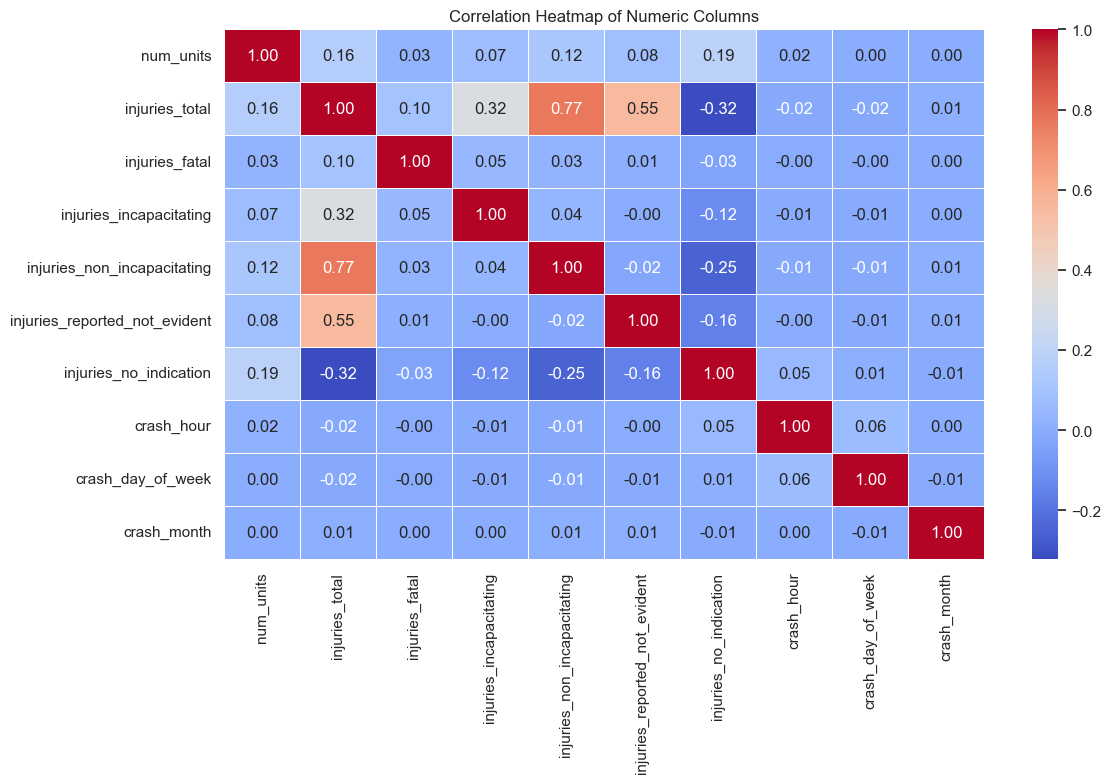

In [9]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])


corr = numeric_cols.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.tight_layout()
plt.show()

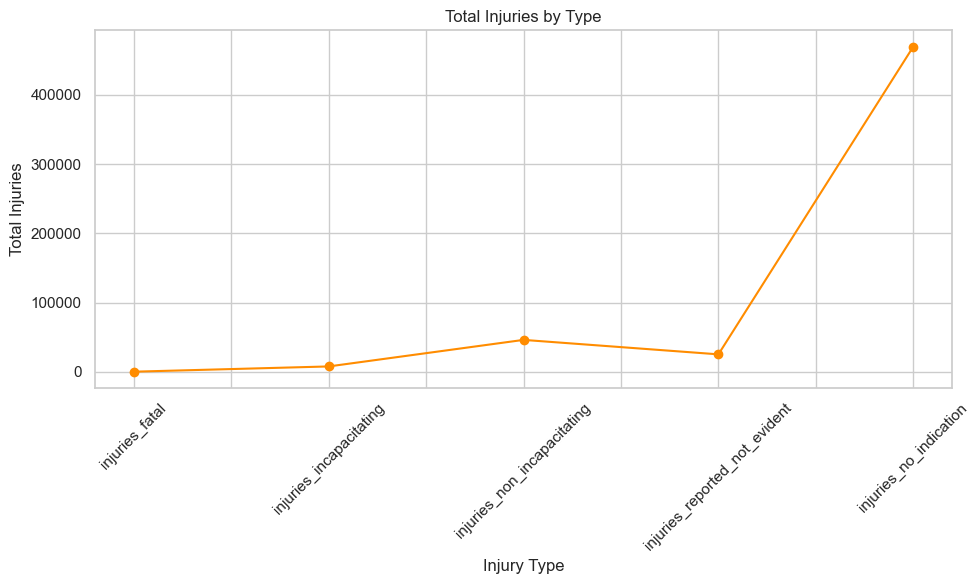

In [10]:
injury_types = ['injuries_fatal', 'injuries_incapacitating', 'injuries_non_incapacitating', 
                'injuries_reported_not_evident', 'injuries_no_indication']
injury_totals = df[injury_types].sum()


plt.figure(figsize=(10,6))
injury_totals.plot(kind='line', marker='o', color='darkorange')
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

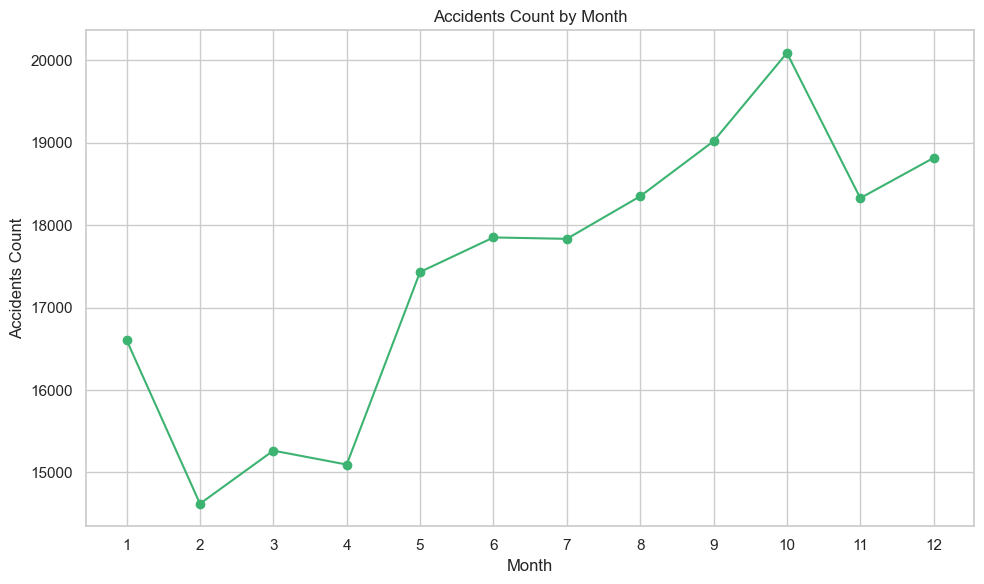

In [11]:
accidents_by_month = df['crash_month'].value_counts().sort_index()


plt.figure(figsize=(10,6))
accidents_by_month.plot(kind='line', marker='o', color='mediumseagreen')
plt.title('Accidents Count by Month')
plt.xlabel('Month')
plt.ylabel('Accidents Count')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

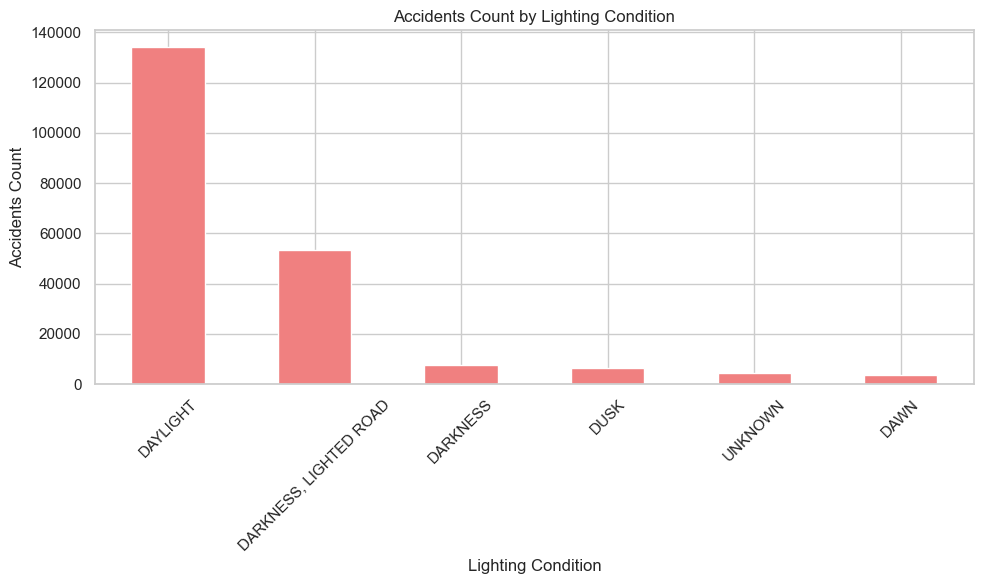

In [12]:
accidents_by_light = df['lighting_condition'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_light.plot(kind='bar', color='lightcoral')
plt.title('Accidents Count by Lighting Condition')
plt.xlabel('Lighting Condition')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

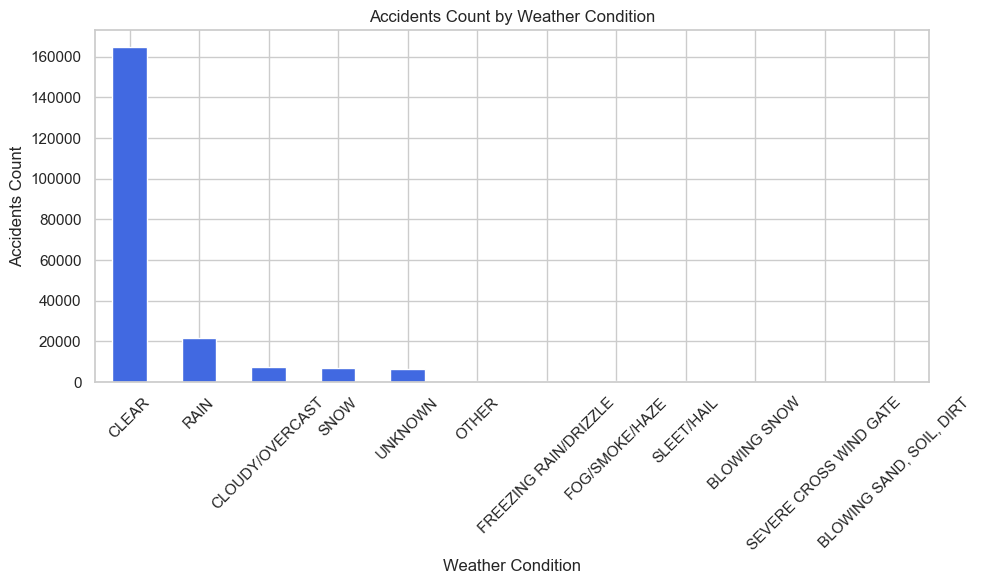

In [13]:
accidents_by_weather = df['weather_condition'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_weather.plot(kind='bar', color='royalblue')
plt.title('Accidents Count by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

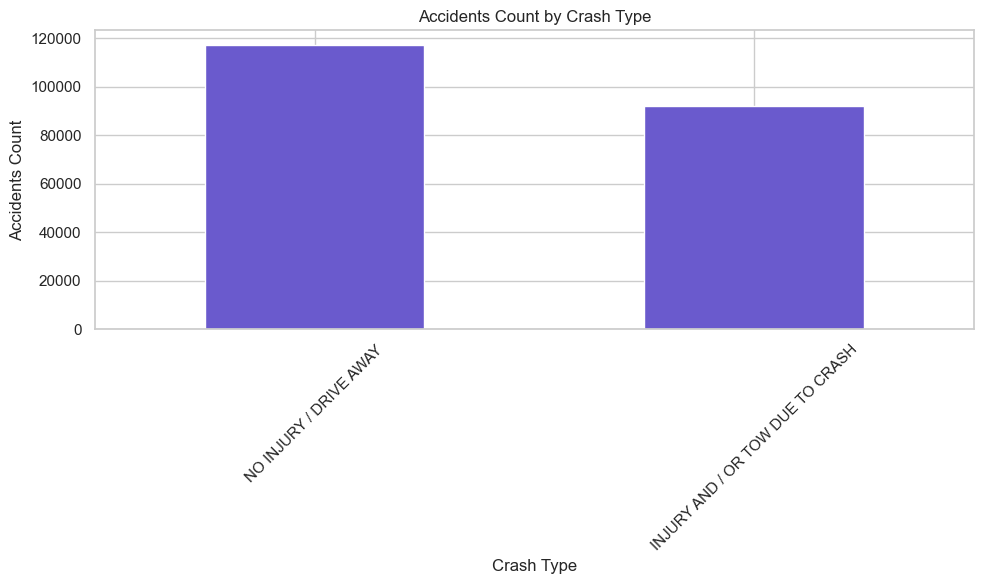

In [14]:
accidents_by_type = df['crash_type'].value_counts()


plt.figure(figsize=(10,6))
accidents_by_type.plot(kind='bar', color='slateblue')
plt.title('Accidents Count by Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

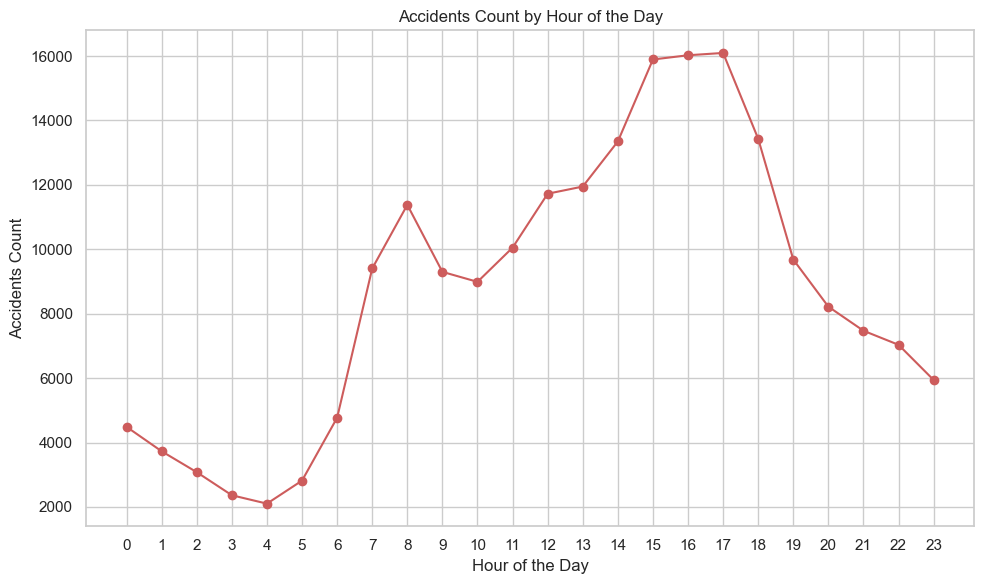

In [15]:
accidents_by_hour = df['crash_hour'].value_counts().sort_index()


plt.figure(figsize=(10,6))
accidents_by_hour.plot(kind='line', marker='o', color='indianred')
plt.title('Accidents Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accidents Count')
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

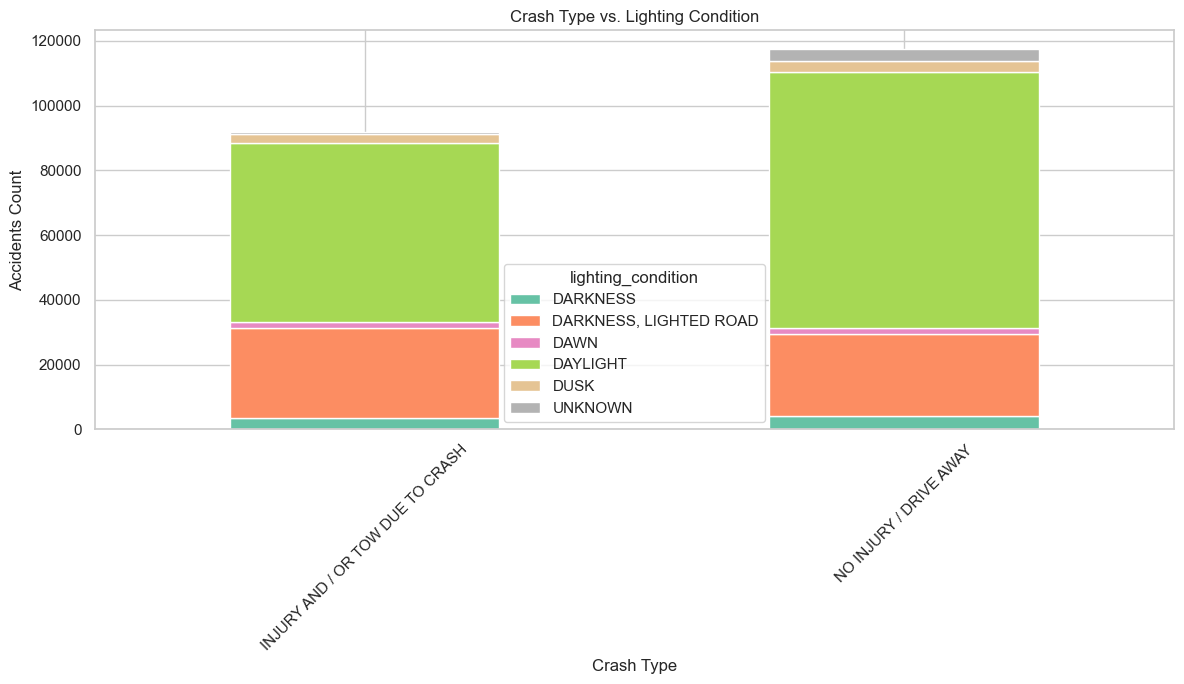

In [16]:
accidents_by_crash_and_light = pd.crosstab(df['crash_type'], df['lighting_condition'])


accidents_by_crash_and_light.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='Set2')
plt.title('Crash Type vs. Lighting Condition')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

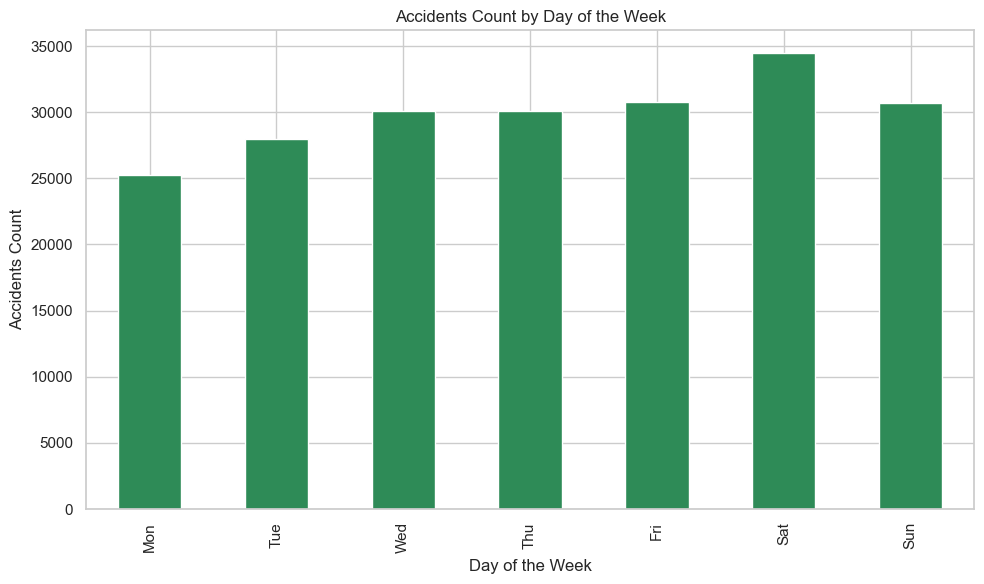

In [17]:
accidents_by_day = df['crash_day_of_week'].value_counts().sort_index()


plt.figure(figsize=(10,6))
accidents_by_day.plot(kind='bar', color='seagreen')
plt.title('Accidents Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Accidents Count')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

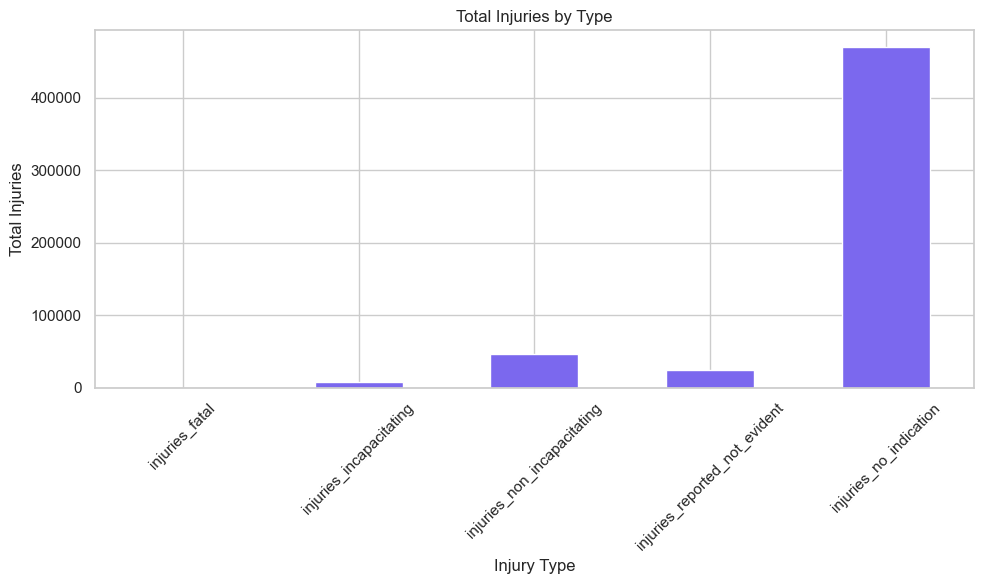

In [18]:
injuries_by_type = df[injury_types].sum()


plt.figure(figsize=(10,6))
injuries_by_type.plot(kind='bar', color='mediumslateblue')
plt.title('Total Injuries by Type')
plt.xlabel('Injury Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

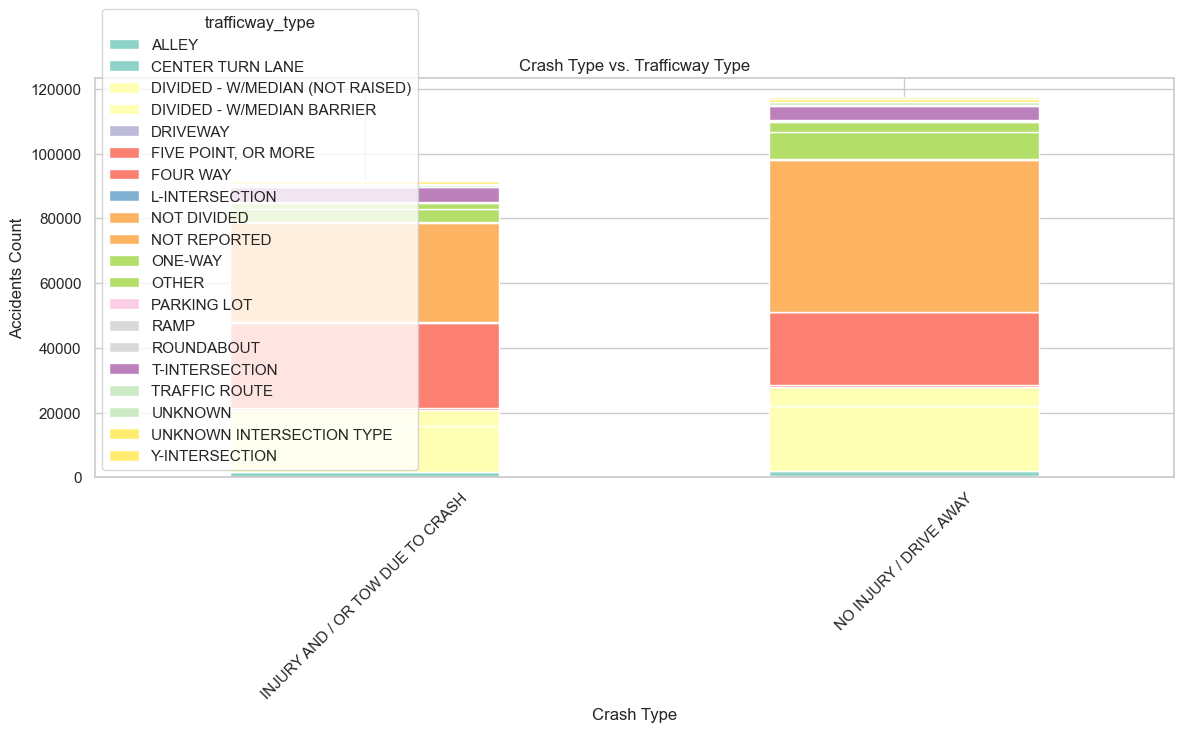

In [19]:
accidents_by_crash_and_road = pd.crosstab(df['crash_type'], df['trafficway_type'])


accidents_by_crash_and_road.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='Set3')
plt.title('Crash Type vs. Trafficway Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

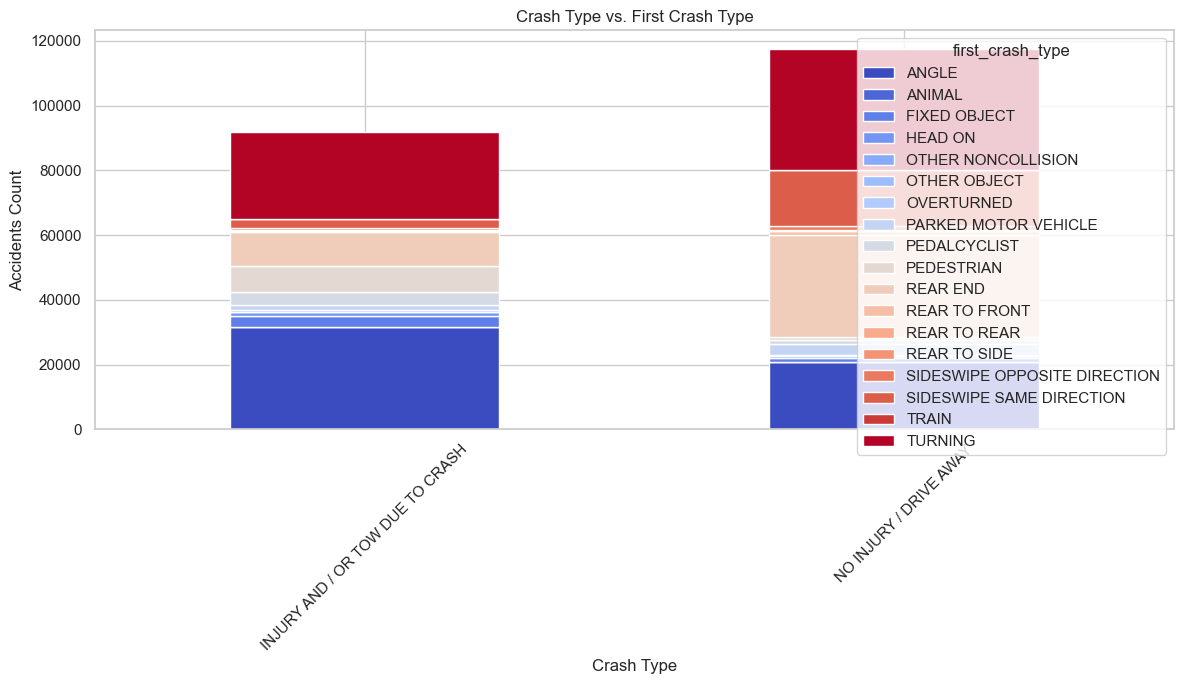

In [20]:
accidents_by_crash_and_first_type = pd.crosstab(df['crash_type'], df['first_crash_type'])


accidents_by_crash_and_first_type.plot(kind='bar', stacked=True, figsize=(12, 7), cmap='coolwarm')
plt.title('Crash Type vs. First Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Accidents Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

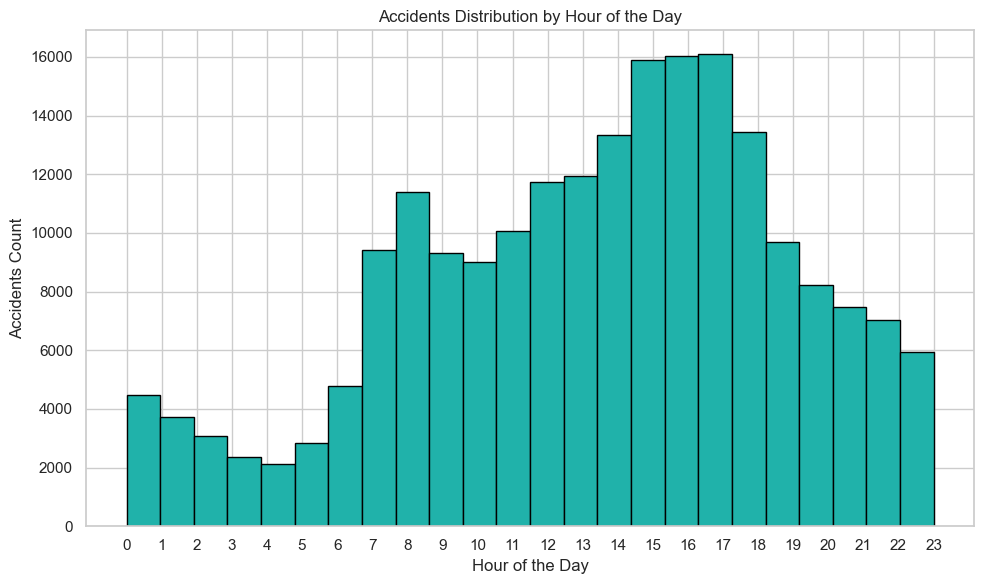

In [21]:
plt.figure(figsize=(10,6))
plt.hist(df['crash_hour'], bins=24, color='lightseagreen', edgecolor='black')
plt.title('Accidents Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Accidents Count')
plt.xticks(range(24))
plt.tight_layout()
plt.show()

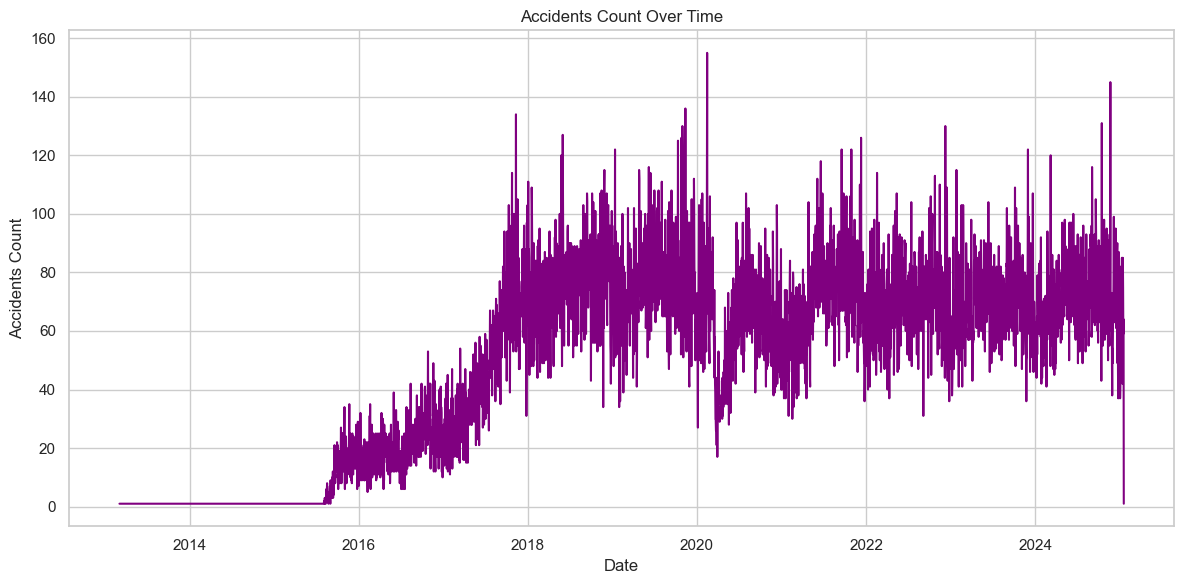

In [22]:
df['crash_date'] = pd.to_datetime(df['crash_date'])


accidents_by_date = df.groupby(df['crash_date'].dt.date).size()


plt.figure(figsize=(12,6))
accidents_by_date.plot(kind='line', color='purple')
plt.title('Accidents Count Over Time')
plt.xlabel('Date')
plt.ylabel('Accidents Count')
plt.tight_layout()
plt.show()

In [23]:
df = df.drop(columns=['crash_date'])

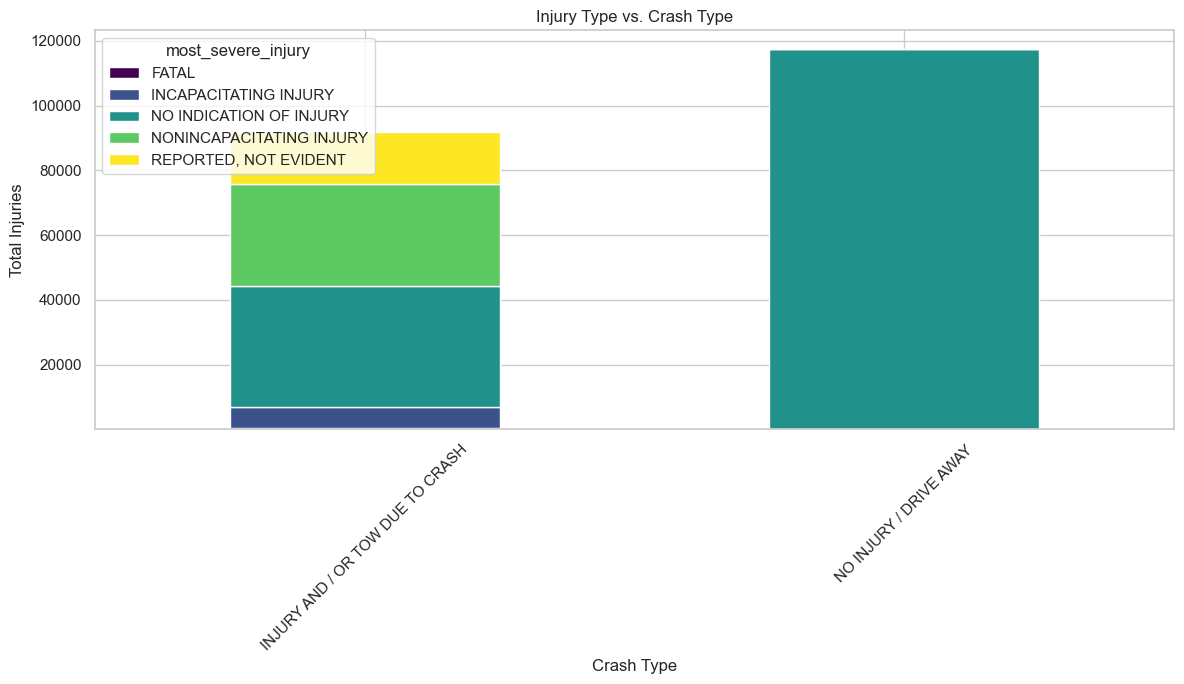

In [24]:
injury_by_crash_type = pd.crosstab(df['crash_type'], df['most_severe_injury'])


injury_by_crash_type.plot(kind='bar', stacked=True, figsize=(12,7), cmap='viridis')
plt.title('Injury Type vs. Crash Type')
plt.xlabel('Crash Type')
plt.ylabel('Total Injuries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # KNN 모델 임포트
from sklearn.metrics import accuracy_score, classification_report

# 1. crash_type (1 ↔ 0)
df['crash_type'] = df['crash_type'].map({
    'NO INJURY / DRIVE AWAY': 0, 
    'INJURY AND / OR TOW DUE TO CRASH': 1
})

# 2. most_severe_injury 재정의
injury_mapping = {
    'NO INDICATION OF INJURY': 0,
    'REPORTED, NOT EVIDENT': 1,
    'NONINCAPACITATING INJURY': 2,
    'INCAPACITATING INJURY': 3,
    'FATAL': 4
}
df['most_severe_injury'] = df['most_severe_injury'].map(injury_mapping)

# 3. 독립변수 Encoding_get dummies로 원핫
one_hot_cols = [
    'traffic_control_device', 'weather_condition', 'lighting_condition',
    'first_crash_type', 'trafficway_type', 'alignment', 'roadway_surface_cond',
    'road_defect', 'intersection_related_i', 'damage', 'prim_contributory_cause'
]

encoded_df = pd.get_dummies(df, columns=one_hot_cols, prefix=one_hot_cols)

# 인코딩 결과 확인
print(encoded_df.head())

# 4. 종속변수 디코딩 값 확인
print("\n종속변수 라벨 인코딩 결과 확인:")
print("\ncrash_type:")
print(df['crash_type'].value_counts())

print("\nmost_severe_injury:")
for key, val in injury_mapping.items():
    print(f"{val} -> {key}")

# 5. 모델 학습
X = encoded_df.drop(columns=['crash_type', 'most_severe_injury'])
y = encoded_df['crash_type']

# 훈련 데이터와 테스트 데이터로 분할 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 정의
model = KNeighborsClassifier(n_neighbors=5)  # K 값 설정, n_neighbors=5

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)

# 결과 출력
print(f"\n정확도: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

   crash_type  num_units  most_severe_injury  injuries_total  injuries_fatal  \
0           0          2                   0             0.0             0.0   
1           0          2                   0             0.0             0.0   
2           0          3                   0             0.0             0.0   
3           1          2                   2             5.0             0.0   
4           0          2                   0             0.0             0.0   

   injuries_incapacitating  injuries_non_incapacitating  \
0                      0.0                          0.0   
1                      0.0                          0.0   
2                      0.0                          0.0   
3                      0.0                          5.0   
4                      0.0                          0.0   

   injuries_reported_not_evident  injuries_no_indication  crash_hour  ...  \
0                            0.0                     3.0          13  ...   
1         

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. BaggingClassifier 모델 정의 (기본 모델로 KNN 사용)
base_model = KNeighborsClassifier(n_neighbors=5)

# BaggingClassifier 정의
bagging_model = BaggingClassifier(base_model, n_estimators=50, random_state=42)

# 2. 모델 학습
bagging_model.fit(X_train, y_train)

# 3. 예측
y_pred_bagging = bagging_model.predict(X_test)

# 4. 정확도 출력
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

# 결과 출력
print(f"\n배깅 모델 정확도: {accuracy_bagging:.4f}")
print(classification_report(y_test, y_pred_bagging))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint

# KNN 모델 정의
model = KNeighborsClassifier()

# 하이퍼파라미터 범위 설정
param_dist = {
    'n_neighbors': randint(3, 20),  # K 값 (3에서 20 사이의 랜덤 값)
    'weights': ['uniform', 'distance'],  # 'uniform': 모든 이웃의 가중치를 동일하게, 'distance': 이웃의 거리에 따라 가중치
    'metric': ['euclidean', 'manhattan', 'minkowski']  # 거리 측정 방법
}

# RandomizedSearchCV로 최적 하이퍼파라미터 찾기
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)

# 모델 학습
random_search.fit(X_train, y_train)

# 최적 하이퍼 파라미터 출력
print(f"최적 하이퍼파라미터: {random_search.best_params_}")

# 최적 모델로 예측
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"\n정확도: {accuracy:.4f}")
print(classification_report(y_test, y_pred))